# ЛР 2

# Статестический ряд. Построение гистограмм равноинтервальным и равновероятностным методами.

In [1]:
from random import uniform
from tabulate import tabulate
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

## Вариационный ряд

In [2]:
def Y(x):
    return 2 / (2 + x)

A = -1
B = 5
n = 1000
X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
x_list = sorted([round(Y(X[i]), 3) for i in range(n)])
print(x_list)

[0.286, 0.286, 0.286, 0.287, 0.287, 0.287, 0.288, 0.288, 0.288, 0.289, 0.289, 0.289, 0.289, 0.29, 0.291, 0.291, 0.291, 0.291, 0.291, 0.291, 0.291, 0.291, 0.292, 0.292, 0.292, 0.292, 0.292, 0.293, 0.293, 0.293, 0.293, 0.293, 0.293, 0.294, 0.294, 0.294, 0.295, 0.295, 0.295, 0.296, 0.296, 0.297, 0.297, 0.297, 0.298, 0.298, 0.298, 0.298, 0.298, 0.299, 0.299, 0.299, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.301, 0.301, 0.301, 0.302, 0.302, 0.302, 0.302, 0.303, 0.303, 0.303, 0.304, 0.304, 0.304, 0.305, 0.305, 0.305, 0.305, 0.305, 0.305, 0.306, 0.306, 0.306, 0.307, 0.307, 0.307, 0.307, 0.307, 0.308, 0.309, 0.309, 0.31, 0.31, 0.311, 0.312, 0.312, 0.313, 0.313, 0.313, 0.314, 0.314, 0.314, 0.315, 0.315, 0.315, 0.315, 0.315, 0.316, 0.316, 0.317, 0.317, 0.317, 0.317, 0.317, 0.318, 0.318, 0.319, 0.319, 0.32, 0.321, 0.321, 0.321, 0.322, 0.323, 0.323, 0.323, 0.324, 0.324, 0.325, 0.325, 0.326, 0.326, 0.328, 0.329, 0.329, 0.329, 0.329, 0.329, 0.329, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.331, 

## Задание 1

### Равноинтервальный метод

In [3]:
m = int(np.sqrt(n))
m

31

Шаг

In [4]:
h = (max(x_list) - min(x_list)) / m
h

0.05451612903225806

In [5]:
a = [round(x_list[i] + i * h, 4) for i in range(m + 1)]
a

[0.286,
 0.3405,
 0.395,
 0.4505,
 0.5051,
 0.5596,
 0.6151,
 0.6696,
 0.7241,
 0.7796,
 0.8342,
 0.8887,
 0.9432,
 0.9987,
 1.0542,
 1.1087,
 1.1633,
 1.2178,
 1.2723,
 1.3268,
 1.3813,
 1.4358,
 1.4914,
 1.5459,
 1.6004,
 1.6549,
 1.7094,
 1.7649,
 1.8195,
 1.874,
 1.9285,
 1.983]

In [6]:
intervals = [(a, b) for (a, b) in zip(a, a[1:])]
intervals

[(0.286, 0.3405),
 (0.3405, 0.395),
 (0.395, 0.4505),
 (0.4505, 0.5051),
 (0.5051, 0.5596),
 (0.5596, 0.6151),
 (0.6151, 0.6696),
 (0.6696, 0.7241),
 (0.7241, 0.7796),
 (0.7796, 0.8342),
 (0.8342, 0.8887),
 (0.8887, 0.9432),
 (0.9432, 0.9987),
 (0.9987, 1.0542),
 (1.0542, 1.1087),
 (1.1087, 1.1633),
 (1.1633, 1.2178),
 (1.2178, 1.2723),
 (1.2723, 1.3268),
 (1.3268, 1.3813),
 (1.3813, 1.4358),
 (1.4358, 1.4914),
 (1.4914, 1.5459),
 (1.5459, 1.6004),
 (1.6004, 1.6549),
 (1.6549, 1.7094),
 (1.7094, 1.7649),
 (1.7649, 1.8195),
 (1.8195, 1.874),
 (1.874, 1.9285),
 (1.9285, 1.983)]

In [7]:
v = []
for interval in intervals:
    left_bound, right_bound = interval
    count = 0
    for i in x_list:
        if left_bound <= i <= right_bound:
            count += 1
    v.append(count)
v

[174,
 141,
 109,
 83,
 66,
 57,
 38,
 40,
 22,
 23,
 29,
 34,
 17,
 12,
 15,
 17,
 9,
 12,
 15,
 14,
 7,
 8,
 5,
 12,
 7,
 9,
 9,
 7,
 6,
 4,
 3]

In [8]:
f_star = [i / (h * n) for i in v]
f_star

[3.191715976331361,
 2.5863905325443786,
 1.9994082840236687,
 1.5224852071005917,
 1.2106508875739646,
 1.0455621301775149,
 0.6970414201183432,
 0.7337278106508875,
 0.4035502958579882,
 0.42189349112426033,
 0.5319526627218935,
 0.6236686390532544,
 0.3118343195266272,
 0.22011834319526627,
 0.27514792899408286,
 0.3118343195266272,
 0.1650887573964497,
 0.22011834319526627,
 0.27514792899408286,
 0.25680473372781065,
 0.12840236686390533,
 0.1467455621301775,
 0.09171597633136094,
 0.22011834319526627,
 0.12840236686390533,
 0.1650887573964497,
 0.1650887573964497,
 0.12840236686390533,
 0.11005917159763313,
 0.07337278106508875,
 0.05502958579881657]

In [9]:
w = [round(i / n, 4) for i in v]
wi = [0]
for k, i in enumerate(w):
    wi.append(round(wi[k] + i, 4))
print(w)
print(wi)

[0.174, 0.141, 0.109, 0.083, 0.066, 0.057, 0.038, 0.04, 0.022, 0.023, 0.029, 0.034, 0.017, 0.012, 0.015, 0.017, 0.009, 0.012, 0.015, 0.014, 0.007, 0.008, 0.005, 0.012, 0.007, 0.009, 0.009, 0.007, 0.006, 0.004, 0.003]
[0, 0.174, 0.315, 0.424, 0.507, 0.573, 0.63, 0.668, 0.708, 0.73, 0.753, 0.782, 0.816, 0.833, 0.845, 0.86, 0.877, 0.886, 0.898, 0.913, 0.927, 0.934, 0.942, 0.947, 0.959, 0.966, 0.975, 0.984, 0.991, 0.997, 1.001, 1.004]


### Таблица

In [10]:
table = [list(item) for item in zip(intervals, f_star, v, w, wi[1:])]
print(tabulate(table, headers=['Интервал', 'Значение функции', 'Количество вариант', 'Частота', 'Накопленная частота'], tablefmt='fancy_grid'))

╒══════════════════╤════════════════════╤══════════════════════╤═══════════╤═══════════════════════╕
│ Интервал         │   Значение функции │   Количество вариант │   Частота │   Накопленная частота │
╞══════════════════╪════════════════════╪══════════════════════╪═══════════╪═══════════════════════╡
│ (0.286, 0.3405)  │          3.19172   │                  174 │     0.174 │                 0.174 │
├──────────────────┼────────────────────┼──────────────────────┼───────────┼───────────────────────┤
│ (0.3405, 0.395)  │          2.58639   │                  141 │     0.141 │                 0.315 │
├──────────────────┼────────────────────┼──────────────────────┼───────────┼───────────────────────┤
│ (0.395, 0.4505)  │          1.99941   │                  109 │     0.109 │                 0.424 │
├──────────────────┼────────────────────┼──────────────────────┼───────────┼───────────────────────┤
│ (0.4505, 0.5051) │          1.52249   │                   83 │     0.083 │               

### Гистограмма

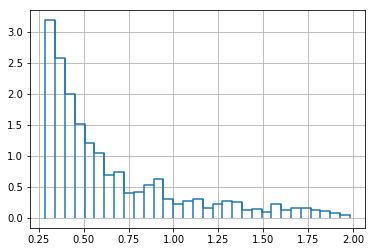

In [11]:
x_plot = a[:]
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.grid(True)
plt.show()

### Полигон распредления

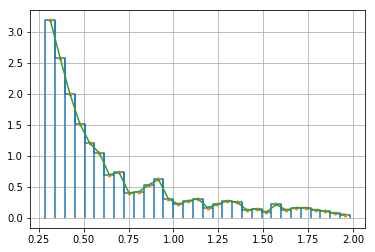

In [12]:
x_plot = a[:]
y_plot = f_star[:]
x_middles = [(i + j) / 2 for (i, j) in intervals]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.plot(x_middles, y_plot[1:], '.')
plt.plot(x_middles, y_plot[1:])
plt.grid(True)
plt.show()

### Эмпирическая функция распредления

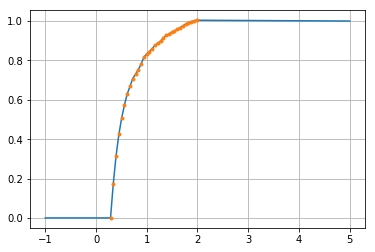

In [13]:
y_plot = wi[:]
x_plot = a[:]
x_plot.insert(0, A)
y_plot.insert(0, 0)
x_plot.append(B)
y_plot.append(1)
plt.plot(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.grid(True)
plt.show()

### Теоретическая плотность распредления

In [14]:
def f(x):
    if A <= x <= B:
        return 1 / (B - A)
    else:
        return 0

def g(y):
    return f(2 / y - 2) * (2 / y**2) 

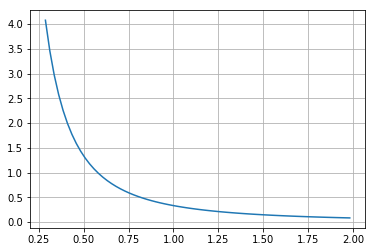

In [15]:
x_lin = np.linspace(min(a[:]), max(a[:]), 70)
plt.plot(x_lin, list(map(g, x_lin)))
plt.grid(True)
plt.show()

### График теоретической и эмпирической плотностей распределения

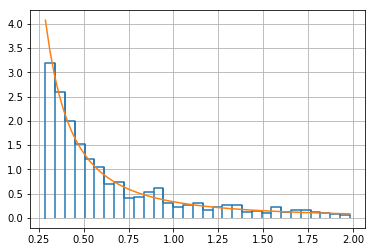

In [16]:
x_plot = a[:]
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
x_lin = np.linspace(min(x_plot), max(x_plot), 70)
plt.plot(x_lin, list(map(g, x_lin)))
plt.grid(True)
plt.show()

## Задание 2

### Равновероятностный метод

In [17]:
m = int(np.sqrt(n))
m

31

Количество вариант в интервале

In [18]:
v = n // m
v

32

In [19]:
a = []
b = []
i = 0
for _ in range(m):
    a.append(x_list[i])
    b.append(x_list[i + v - 1])
    i += v
intervals = [(i, j) for (i, j) in zip(a, b)]
intervals

[(0.286, 0.293),
 (0.293, 0.301),
 (0.301, 0.312),
 (0.312, 0.324),
 (0.324, 0.335),
 (0.336, 0.349),
 (0.349, 0.364),
 (0.364, 0.373),
 (0.373, 0.385),
 (0.385, 0.398),
 (0.398, 0.416),
 (0.417, 0.434),
 (0.434, 0.447),
 (0.447, 0.462),
 (0.463, 0.486),
 (0.487, 0.511),
 (0.512, 0.538),
 (0.541, 0.571),
 (0.573, 0.601),
 (0.601, 0.634),
 (0.635, 0.681),
 (0.683, 0.723),
 (0.727, 0.8),
 (0.801, 0.871),
 (0.872, 0.924),
 (0.925, 1.007),
 (1.009, 1.144),
 (1.144, 1.282),
 (1.292, 1.412),
 (1.431, 1.638),
 (1.641, 1.844)]

In [20]:
h = [j - i for (i, j) in zip(a, b)]
h

[0.007000000000000006,
 0.008000000000000007,
 0.01100000000000001,
 0.01200000000000001,
 0.01100000000000001,
 0.012999999999999956,
 0.015000000000000013,
 0.009000000000000008,
 0.01200000000000001,
 0.013000000000000012,
 0.01799999999999996,
 0.017000000000000015,
 0.013000000000000012,
 0.015000000000000013,
 0.022999999999999965,
 0.02400000000000002,
 0.026000000000000023,
 0.029999999999999916,
 0.028000000000000025,
 0.03300000000000003,
 0.04600000000000004,
 0.039999999999999925,
 0.07300000000000006,
 0.06999999999999995,
 0.052000000000000046,
 0.08199999999999985,
 0.135,
 0.13800000000000012,
 0.11999999999999988,
 0.20699999999999985,
 0.20300000000000007]

In [21]:
f_star = [v / (n * i) for i in h]
f_star

[4.571428571428568,
 3.9999999999999964,
 2.909090909090906,
 2.6666666666666643,
 2.909090909090906,
 2.46153846153847,
 2.1333333333333315,
 3.5555555555555527,
 2.6666666666666643,
 2.4615384615384595,
 1.7777777777777817,
 1.882352941176469,
 2.4615384615384595,
 2.1333333333333315,
 1.3913043478260891,
 1.3333333333333321,
 1.2307692307692297,
 1.0666666666666698,
 1.142857142857142,
 0.9696969696969688,
 0.6956521739130428,
 0.8000000000000016,
 0.43835616438356123,
 0.4571428571428574,
 0.6153846153846149,
 0.39024390243902507,
 0.23703703703703705,
 0.2318840579710143,
 0.26666666666666694,
 0.15458937198067643,
 0.1576354679802955]

In [22]:
wi = [0]
for i in range(m):
    wi.append(round(wi[i] + v / n, 4))
wi

[0,
 0.032,
 0.064,
 0.096,
 0.128,
 0.16,
 0.192,
 0.224,
 0.256,
 0.288,
 0.32,
 0.352,
 0.384,
 0.416,
 0.448,
 0.48,
 0.512,
 0.544,
 0.576,
 0.608,
 0.64,
 0.672,
 0.704,
 0.736,
 0.768,
 0.8,
 0.832,
 0.864,
 0.896,
 0.928,
 0.96,
 0.992]

### Таблица

In [23]:
table = [list(item) for item in zip(intervals, f_star, h, wi[1:])]
print(tabulate(table, headers=['Интервал', 'Значение функции', 'Шаг', 
                               'Накопленная частота'], tablefmt='fancy_grid'))

╒════════════════╤════════════════════╤═══════╤═══════════════════════╕
│ Интервал       │   Значение функции │   Шаг │   Накопленная частота │
╞════════════════╪════════════════════╪═══════╪═══════════════════════╡
│ (0.286, 0.293) │           4.57143  │ 0.007 │                 0.032 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.293, 0.301) │           4        │ 0.008 │                 0.064 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.301, 0.312) │           2.90909  │ 0.011 │                 0.096 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.312, 0.324) │           2.66667  │ 0.012 │                 0.128 │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.324, 0.335) │           2.90909  │ 0.011 │                 0.16  │
├────────────────┼────────────────────┼───────┼───────────────────────┤
│ (0.336, 0.349) │           2.46154  │ 0.013 │                 

### Гистограмма

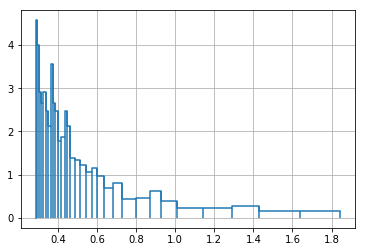

In [24]:
x_plot = a[:]
x_plot.append(b[-1])
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.grid(True)
plt.show()

### Полигон распределения

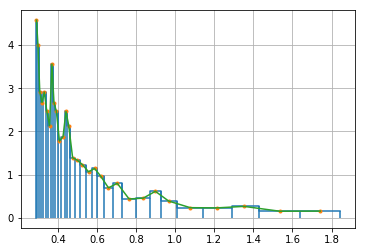

In [25]:
x_plot = a[:]
x_plot.append(b[-1])
y_plot = f_star[:]
x_middles = [(i + j) / 2 for (i, j) in intervals]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
plt.plot(x_middles, y_plot[1:], '.')
plt.plot(x_middles, y_plot[1:])
plt.grid(True)
plt.show()

### Эмпирическая функция распределения

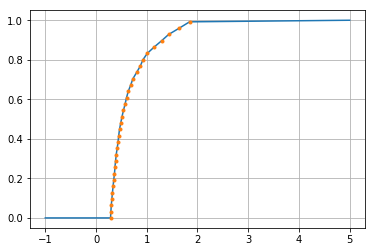

In [26]:
y_plot = wi[:]
x_plot = a[:]
x_plot.append(b[-1])
x_plot.insert(0, A)
y_plot.insert(0, 0)
x_plot.append(B)
y_plot.append(1)
plt.plot(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
plt.grid(True)
plt.show()

### График теоретической и эмпирической плотностей распределения

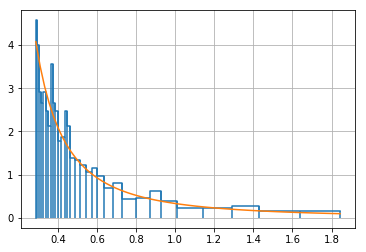

In [27]:
x_plot = a[:]
x_plot.append(b[-1])
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
x_lin = np.linspace(min(a[:]), max(b[:]), 70)
plt.plot(x_lin, list(map(g, x_lin)))
plt.grid(True)
plt.show()